<a href="https://colab.research.google.com/github/casangi/cngi_prototype/blob/master/docs/verification/vis_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visibility Regression

Here we map CASA 6 MS middleware related tasks to the equivalent CNGI functionality and show that the resulting numerical output is the same


In [0]:
import os, warnings
warnings.simplefilter("ignore", category=RuntimeWarning)  # suppress warnings about nan-slices
print("installing cngi (takes a few minutes)...")
os.system("apt-get install libgfortran3")
os.system("pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casatasks==6.0.0.27")
os.system("pip install cngi-prototype==0.0.49")

print("downloading MeasurementSet from CASAguide First Look at Imaging...")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")

from cngi.conversion import convert_ms
from cngi.vis import visplot
import numpy as np
global_xds, vis_xds = convert_ms('sis14_twhya_calibrated_flagged.ms')

installing cngi (takes a few minutes)...
downloading MeasurementSet from CASAguide First Look at Imaging...
processing sis14_twhya_calibrated_flagged.ms 
writing global partition
meta data processing time  0.7967453002929688
**********************************
Processing ddi 0
Selecting and sorting time  0.02718830108642578
n_time: 410   n_baseline: 210   n_chan: 384   n_pol: 2  chunking:  [100, 400, 20, 1]  batchsize:  100
Completed ddi 0  process time  18.653664350509644
**********************************




---

## listobs

Note the mechanism for retrieving data from the MeasurementSet is fundamentally different, but the data itself is the same


In [0]:
# CASA 6
from casatasks import listobs

listobs(vis='sis14_twhya_calibrated_flagged.ms', field="J1037-295", listfile='obslist.txt', overwrite=True)
!cat obslist.txt

           MeasurementSet Name:  /content/sis14_twhya_calibrated_flagged.ms      MS Version 2
   Observer: cqi     Project: uid://A002/X327408/X6f  
Observation: ALMA
Data records: 16000       Total elapsed time = 4702.61 seconds
   Observed from   19-Nov-2012/07:52:42.0   to   19-Nov-2012/09:11:04.7 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  19-Nov-2012/07:52:42.0 - 07:53:47.6    10      3 J1037-295                 1900  [0]  [6.05] [CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE]
              08:04:36.3 - 08:05:41.9    14      3 J1037-295                 1900  [0]  [6.05] [CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE]
              08:16:20.6 - 08:17:26.2    18      3 J1037-295                 2100  [0]  [6.05] [CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE]
              08:28:17.1 - 08:29:22.6    22      3 J1037-295                 2100  

In [0]:
# CNGI
global_xds.sel(field="J1037-295").compute()

<xarray.Dataset>
Dimensions:                 (antenna: 26, d1: 1, d2: 2, d3: 3, feed: 1, observation: 1, processor: 3, receptors: 3, source: 5, spw: 1, state: 20, time_fcmd: 5067, time_hist: 1132)
Coordinates:
  * antenna                 (antenna) int64 0 1 2 3 4 5 6 ... 20 21 22 23 24 25
  * spw                     (spw) int64 0
  * feed                    (feed) int64 0
  * receptors               (receptors) int64 0 1 2
    field                   <U10 'J1037-295'
  * time_fcmd               (time_fcmd) datetime64[ns] 2012-11-19T07:28:06.096000671 ... 2012-11-19T09:11:31.978034973
  * time_hist               (time_hist) datetime64[ns] 2012-11-28T06:33:06.728000641 ... 2014-05-01T14:00:24.296000481
  * observation             (observation) <U22 'uid://A002/X327408/X6f'
  * processor               (processor) <U14 'CORRELATOR (0)' ... 'CORRELATOR (2)'
  * source                  (source) int32 0 1 2 3 4
  * state                   (state) <U82 'CALIBRATE_BANDPASS#ON_SOURCE,CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE (0)' ... 'OBSERVE_TARGET#ON_SOURCE (19)'
Dimensions without coordinates: d1, d2, d3
Data variables:
    ANT_OFFSET              (antenna, d3) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ANT_POSITION            (antenna, d3) float64 2.225e+06 ... -2.482e+06
    ANT_TYPE                (antenna) <U16 'GROUND-BASED' ... 'GROUND-BASED'
    ANT_DISH_DIAMETER       (antenna) float64 12.0 12.0 12.0 ... 12.0 12.0 12.0
    ANT_FLAG_ROW            (antenna) bool False False False ... False False
    ANT_MOUNT               (antenna) <U16 'ALT-AZ' 'ALT-AZ' ... 'ALT-AZ'
    ANT_NAME                (antenna) <U16 'DA41' 'DA42' ... 'DV22' 'DV23'
    ANT_STATION             (antenna) <U16 'A003' 'A050' ... 'A011' 'A007'
    FEED_POSITION           (spw, antenna, feed, d3) float64 0.0 0.0 ... 0.0 0.0
    FEED_BEAM_OFFSET        (spw, antenna, feed, d2, receptors) float64 0.0 ... 0.0
    FEED_POLARIZATION_TYPE  (spw, antenna, feed, receptors) <U16 'X' 'Y' ... '0'
    FEED_POL_RESPONSE       (spw, antenna, feed, receptors, receptors) complex128 0j ... 0j
    FEED_RECEPTOR_ANGLE     (spw, antenna, feed, receptors) float64 -52.5 ... 0.0
    FEED_BEAM_ID            (spw, antenna, feed) int32 -1 -1 -1 -1 ... -1 -1 -1
    FEED_INTERVAL           (spw, antenna, feed) float64 4.363e+09 ... 4.363e+09
    FEED_NUM_RECEPTORS      (spw, antenna, feed) int32 2 2 2 2 2 2 ... 2 2 2 2 2
    FEED_TIME               (spw, antenna, feed) datetime64[ns] 2082-01-07T03:37:30.398387909 ... 2082-01-07T03:37:30.398387909
    FIELD_DELAY_DIR         (d2, d1) float64 2.781 -0.516
    FIELD_PHASE_DIR         (d2, d1) float64 2.781 -0.516
    FIELD_REFERENCE_DIR     (d2, d1) float64 2.781 -0.516
    FIELD_CODE              <U16 'none'
    FIELD_FLAG_ROW          bool False
    FIELD_NUM_POLY          int32 0
    FIELD_SOURCE_ID         int32 3
    FIELD_TIME              datetime64[ns] 2012-11-19T07:48:25.536000252
    FIELD_PhaseDir_Ref      int32 0
    FIELD_DelayDir_Ref      int32 0
    FIELD_RefDir_Ref        int32 0
    FCMD_APPLIED            (time_fcmd) bool True True True ... True True True
    FCMD_COMMAND            (time_fcmd) <U75 "antenna='DV13' timerange='2012/11/19/07:28:04.560~2012/11/19/07:28:07.632'" ... "antenna='DV06' timerange='2012/11/19/09:11:24.206~2012/11/19/09:11:39.750'"
    FCMD_INTERVAL           (time_fcmd) float64 3.072 1.013 ... 15.57 15.54
    FCMD_LEVEL              (time_fcmd) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    FCMD_REASON             (time_fcmd) <U47 'Mount_is_off_source' ... 'The_WCA_is_not_locked.'
    FCMD_SEVERITY           (time_fcmd) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    FCMD_TYPE               (time_fcmd) <U16 'FLAG' 'FLAG' ... 'FLAG' 'FLAG'
    FCMD_APPLICATION        (time_hist) <U16 'ms' 'ms' 'ms' ... 'ms' 'ms' 'ms'
    FCMD_MESSAGE            (time_hist) <U188 'taskname = flagcmd' ... 'keepflags   = False'
    FCMD_OBJECT_ID          (time_hist) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    FCMD_OB



---

## listvis

Note the mechanism for retrieving data from the MeasurementSet is fundamentally different, but the data itself is the same

In [0]:
# CASA 6
from casatasks import listvis

os.system("rm -fr vislist.txt")
listvis(vis='sis14_twhya_calibrated_flagged.ms', field="J1037-295", timerange='<07:53:00', antenna='DA46', 
        spw='*:30~40', datacolumn='data', listfile='vislist.txt')
!tail -n 18 vislist.txt

Units of columns are: Date/Time(YYMMDD/HH:MM:SS UT), UVDist(wavelength), Phase(deg), UVW(m)
FIELD: 3
SPW: 0
Date/Time:                           XX:                  YY:                                              
2012/11/19/      Intrf UVDist  Chn     Amp     Phs  Wt F    Amp     Phs  Wt F         U         V         W
------------|---------|------|----|---------------------|--------------------|---------|---------|---------|
  07:52:57.2 DA46-DV23  65292   30: 14.690   -18.7   9    6.279    40.7  17       44.17     28.46     43.89
  07:52:57.2 DA46-DV23  65292   31:  1.951    62.0   9    1.091   132.5  17       44.17     28.46     43.89
  07:52:57.2 DA46-DV23  65292   32: 12.303    -5.4   9    1.837    83.7  17       44.17     28.46     43.89
  07:52:57.2 DA46-DV23  65292   33: 32.372   -63.7   9    9.889   -18.0  17       44.17     28.46     43.89
  07:52:57.2 DA46-DV23  65292   34: 13.741    61.8   9   19.342   -45.3  17       44.17     28.46     43.89
  07:52:57.2 DA46-DV23  652

In [0]:
# CNGI
vis_xds.DATA.isel(chan=range(30,40)).sel(time='2012-11-19T07:52').where(vis_xds.field == 'J1037-295', drop=True).compute()

<xarray.DataArray 'DATA' (time: 3, baseline: 210, chan: 10, pol: 2)>
array([[[[ -2.60023475 +1.72831631j,   4.05808353 +1.98475695j],
         [ -7.23498249-18.3353653j ,   7.60525131 +1.53672731j],
         [  6.74281263+13.11826992j,   6.65495205 +7.65169096j],
         ...,
         [  1.89528954-12.00849056j,   5.62021685+13.52437019j],
         [-16.38225365 +8.99818993j,  -2.33699489 -1.99898553j],
         [  2.8367734  -9.67327309j,  -4.14121532+19.10547447j]],

        [[  3.28837299 -6.86054277j,   3.61904168 -1.5244379j ],
         [ 11.50727272 +1.3162272j ,  -1.94389617-14.34980583j],
         [ -8.96152973-11.32757187j,   3.33147168 -6.62474728j],
         ...,
         [ -6.68487978 -4.06573296j,   2.64523125 +0.74718982j],
         [ -6.44090509+14.18421364j,  -1.7098881  -3.51151109j],
         [  3.02653003+22.60029221j,  -1.93810916 -4.28527832j]],

        [[  0.62795073 -9.81886673j,   4.79439831 -1.10733175j],
         [  2.76336598 -0.34989274j,  -2.59845543 -4.25936317j],
         [  6.50986624 -0.56244791j,   0.64118993 +9.67572594j],
         ...,
         [ -2.87518525-13.76701069j,   2.12770963 -5.63647318j],
         [ 10.0987196  +6.20645571j,   0.56528896 -3.81523848j],
         [ -2.80478644 +1.82602417j,  -0.4319177  +0.93079174j]],

        ...,

        [[ 13.2557888 -10.80822372j,  -2.75912595 -3.66847825j],
         [ -4.02989388-11.04999352j,   8.59494591-12.17647934j],
         [  3.87953186 -1.55737591j,  -0.2775012  +2.26899052j],
         ...,
         [ -2.84630656 -0.45505962j,  -9.70447063 -4.0012598j ],
         [-10.46845436-24.45387077j,   5.06111193 -2.38000035j],
         [-13.02188206 +1.731094j  ,   0.31684911 +6.69561148j]],

        [[ 13.34558201 -6.2214222j ,  21.79777908 +2.8505578j ],
         [ -0.84075814 +0.7786088j ,   5.40018225 +7.55053663j],
         [ 18.25265121 -3.96430516j,  -2.02582288 -3.19143486j],
         ...,
         [ 12.68769836 +0.74826258j,  10.60458851 -0.20912685j],
         [  2.27541041 +8.99934292j,  11.47423363 -2.47139621j],
         [  4.58683252-15.13885784j,   6.70116806+10.32892036j]],

        [[  2.95400715-15.4544878j ,   6.73404503 +0.35294309j],
         [  4.24857998 -6.25366259j,   7.28804111 +1.05034769j],
         [ 10.05299759+13.30004311j,  -8.47478867+10.72530651j],
         ...,
         [  7.6305933 +16.44323158j,   5.25853682-10.45359612j],
         [  9.74306965 +2.79728198j,  -9.47006321 -3.56549239j],
         [  2.62371182 +1.67524588j,   1.14390659-14.44668484j]]],


       [[[ 11.35436058 -7.97615433j,   8.16503143 +0.50412035j],
         [-12.26723766 +0.76832557j,  -6.5140872  +2.8781364j ],
         [ 18.8516674 +13.34286404j, -11.63303566 +2.61941814j],
         ...,
         [  3.44717979 +2.18584609j, -14.68510151 +4.67997551j],
         [ -0.16832025-22.29740143j,   1.99631619 +6.38193607j],
         [  8.2172823  -3.29308605j,  -0.56155562 -3.44060659j]],

        [[  9.07193851 +3.60066056j,  -0.71551943 -5.99223375j],
         [  4.46299982 +0.33026356j,  -1.42801225 -7.56787634j],
         [  4.10656977 -2.18936491j,   2.64019036 -2.84345913j],
         ...,
         [ -3.68207765+19.41233826j,  -3.51211762+11.56481647j],
         [ -4.74033308 -2.21565914j,   2.1653204  -2.74378109j],
         [ -7.5386858  -4.8035531j ,   9.5079422  -9.28013134j]],

        [[ -6.11708212 +2.24607897j,   6.73949146 -9.54430103j],
         [  9.96527767 -6.70763969j,   2.16639781 -5.65109444j],
         [  6.17766333 -1.05842614j,  -2.86380291 -0.670955j  ],
         ...,
         [ -2.54455566+12.33150291j,  -0.55009294 -2.07822227j],
         [ -4.11478376-11.68026352j,   5.17302465 +8.54477787j],
         [  8.48542118 +7.35842609j,  -8.78794479 +5.98381948j]],

        ...,

        [[ 10.0119791  -0.06870089j,   2.70085168 -4.01332855j],
         [ 10.05011654 -8.27938938j,   1.30086768 -5.53621054j],
         [ -6.24352455 -5.82100964j,   0.13223408-28.34838676j],
         ...,
         [  7.44964504-11.31081581j,  



---

## listhistory - TBD




---

## concat - TBD

to be implemented as visjoin.

The exact design for this is still to be determined. This would operate on the zarr directories, not the xarray datasets. Each DDI partition would remain separate (see joinddi for that). So this would involve re-mapping duplicate DDI's to unique values and then combining the global data partition somehow.



---

## conjugatevis


processing casa6.conj.ms 
writing global partition
meta data processing time  0.8028175830841064
**********************************
Processing ddi 0
Selecting and sorting time  0.026227712631225586
n_time: 410   n_baseline: 210   n_chan: 384   n_pol: 2  chunking:  [100, 400, 20, 1]  batchsize:  100
Completed ddi 0  process time  17.743288040161133
**********************************


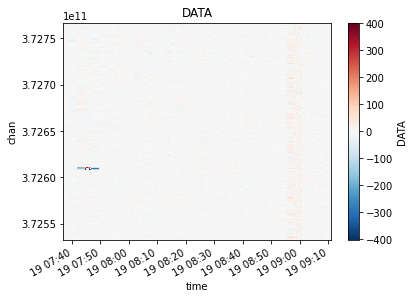

In [0]:
# CASA 6
from casatasks import conjugatevis

conjugatevis(vis='sis14_twhya_calibrated_flagged.ms', outputvis='casa6.conj.ms', overwrite=True)

casa_xds = convert_ms('casa6.conj.ms')[1]
visplot(casa_xds.DATA.imag[:,100,:,0], axis=['time','chan'])

In [0]:
# CNGI
cngi_xda = vis_xds.DATA.conj()

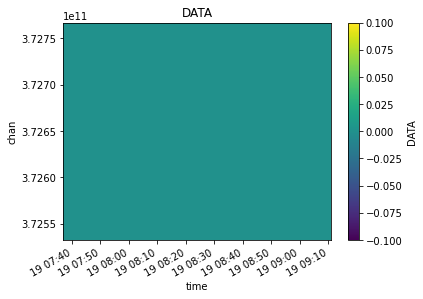

max delta :  0.0


In [0]:
# Delta
visplot(casa_xds.DATA.imag[:,100,:,0] - cngi_xda.imag[:,100,:,0], axis=['time','chan'])
print('max delta : ', np.nanmax(np.abs((casa_xds.DATA - cngi_xda).values)))



---

## hanningsmooth


processing casa6.smooth.ms 
writing global partition
meta data processing time  0.8135240077972412
**********************************
Processing ddi 0
Selecting and sorting time  0.025293350219726562
n_time: 410   n_baseline: 210   n_chan: 384   n_pol: 2  chunking:  [100, 400, 20, 1]  batchsize:  100
Completed ddi 0  process time  17.388922452926636
**********************************


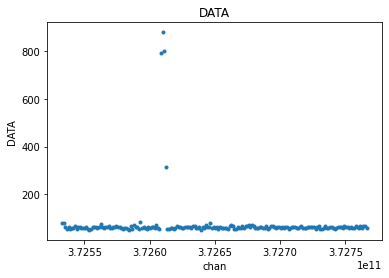

In [0]:
# CASA6
from casatasks import hanningsmooth

hanningsmooth(vis='sis14_twhya_calibrated_flagged.ms', outputvis='casa6.smooth.ms', datacolumn='data')

casa_xds = convert_ms('casa6.smooth.ms')[1]
visplot(casa_xds.DATA, axis='chan')

In [0]:
# CNGI
from cngi.vis import applyflags, chansmooth

cngi_xds = chansmooth(vis_xds)

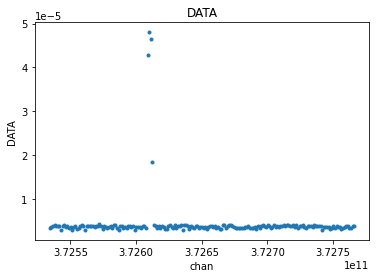

max delta :  6.104260637590507e-05


In [0]:
# Delta
visplot(casa_xds.DATA - cngi_xds.DATA, axis='chan')
print('max delta : ', np.nanmax(np.abs((casa_xds.DATA - cngi_xds.DATA).values)))



---

## mstransform


### combinespws - TBD

to be implemented as ddijoin.

The exact design for this is still to be determined. Within a DDI, basic splitting and concatenation of data is built in to the xarray structure. Combining DDI's of the same shape along an axis (i.e. time) is also supported natively by the xarray framework. However, metadata attributes and global partition references need to be handled (or not) in a consistent manner.

### chanaverage

processing casa6.avg.ms 
writing global partition
meta data processing time  0.7950432300567627
**********************************
Processing ddi 0
Selecting and sorting time  0.025155067443847656
n_time: 410   n_baseline: 210   n_chan: 128   n_pol: 2  chunking:  [100, 400, 20, 1]  batchsize:  100
Completed ddi 0  process time  6.2626707553863525
**********************************


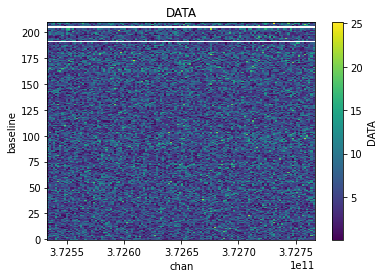

In [0]:
# CASA 6
from casatasks import mstransform

os.system("rm -fr casa6.avg.ms")
mstransform(vis='sis14_twhya_calibrated_flagged.ms', outputvis='casa6.avg.ms', datacolumn='DATA', chanaverage=True, chanbin=3)

casa_xds = convert_ms('casa6.avg.ms')[1]
visplot(casa_xds.DATA[100,:,:,0], axis=['chan', 'baseline'])

In [0]:
# CNGI
from cngi.vis import chanaverage

cngi_xds = chanaverage(vis_xds.where(~vis_xds.FLAG), width=3)

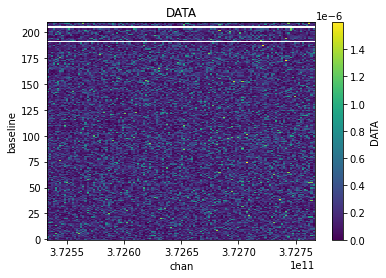

max delta :  1.5973847098419519e-06


In [0]:
# Delta
visplot(casa_xds.DATA[100,:,:,0] - cngi_xds.DATA[100,:,:,0], axis=['chan', 'baseline'])
print('max delta : ', np.nanmax(np.abs((casa_xds.DATA[100,:,:,0] - cngi_xds.DATA[100,:,:,0]).values)))

### regridms - TBD

to be implemented as ddiregrid

### timeaverage

processing casa6.tavg.ms 
writing global partition
meta data processing time  0.7925424575805664
**********************************
Processing ddi 0
Selecting and sorting time  0.010873079299926758
n_time: 198   n_baseline: 210   n_chan: 384   n_pol: 2  chunking:  [100, 400, 20, 1]  batchsize:  100
Completed ddi 0  process time  6.672131538391113
**********************************


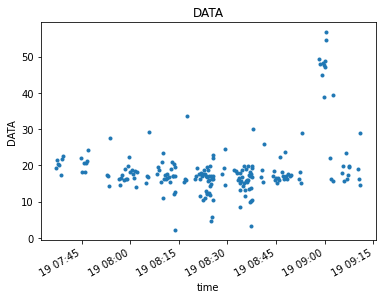

In [0]:
# CASA 6
from casatasks import mstransform

os.system("rm -fr casa6.tavg.ms")
mstransform(vis='sis14_twhya_calibrated_flagged.ms', outputvis='casa6.tavg.ms', datacolumn='DATA', timeaverage=True, timebin='18.144s', timespan='state')

casa_xds = convert_ms('casa6.tavg.ms')[1]
visplot(casa_xds.DATA[:,:,100,0], axis='time')

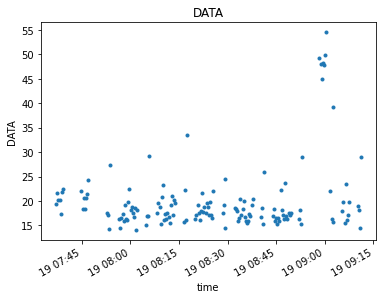

In [0]:
# CNGI
from cngi.vis import timeaverage

cngi_xds = timeaverage(vis_xds, width=3, timespan='state')

visplot(cngi_xds.DATA[:,:,100,0], axis='time')

In [0]:
# Delta
# currently not producing comparable output
print('CASA output dimensions : ', dict(casa_xds.dims))
print('CNGI output dimensions : ', dict(cngi_xds.dims))

CASA output dimensions :  {'baseline': 210, 'chan': 384, 'pair': 2, 'pol': 2, 'receptor': 2, 'spw': 1, 'time': 198, 'uvw_index': 3}
CNGI output dimensions :  {'baseline': 210, 'chan': 384, 'pair': 2, 'pol': 2, 'receptor': 2, 'spw': 1, 'time': 145, 'uvw_index': 3}




---

## phaseshift / fixvis - TBD

to be implemented as phaseshift



---

## split


processing casa6.split.ms 
writing global partition
meta data processing time  0.8132867813110352
**********************************
Processing ddi 0
Selecting and sorting time  0.006523847579956055
n_time: 80   n_baseline: 210   n_chan: 23   n_pol: 2  chunking:  [100, 400, 20, 1]  batchsize:  100
Completed ddi 0  process time  0.391568660736084
**********************************


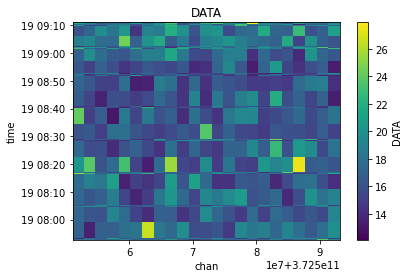

In [0]:
# CASA 6
from casatasks import split

os.system("rm -fr casa6.split.ms")
split(vis='sis14_twhya_calibrated_flagged.ms', outputvis='casa6.split.ms', datacolumn='DATA', spw='*:30~100', field='3', width=3)

casa_xds = convert_ms('casa6.split.ms')[1]
visplot(casa_xds.DATA, axis=['chan', 'time'])

In [0]:
# CNGI
from cngi.vis import chanaverage

cngi_xds = chanaverage(vis_xds.isel(chan=range(30,101)).where(vis_xds.field == 'J1037-295', drop=True), width=3)

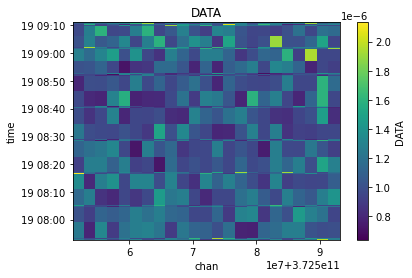

max delta :  2.132480599880018e-06


In [0]:
# Delta
visplot(casa_xds.DATA - cngi_xds.DATA, axis=['chan', 'time'])
print('max delta : ', np.nanmax(np.abs((casa_xds.DATA - cngi_xds.DATA).values)))


---

## uvcontsub - TBD

likely to be demonstrated as uvcontfit and subtraction using built in xarray mathematics



---

## uvmodelfit - TBD

to be implemented as uvmodelfit




---

## uvsub - TBD

likely to be demonstrated using built in xarray mathematics



---

## vishead

Note the mechanism for retrieving data from the MeasurementSet is fundamentally different, but the data itself is the same


In [0]:
# CASA 6
from casatasks import vishead

vishead(vis='sis14_twhya_calibrated_flagged.ms', mode='list')

{'field': (array(['J0522-364', 'J0539+145', 'Ceres', 'J1037-295', 'TW Hya', 'TW Hya',
         '3c279'], dtype='<U16'), {}),
 'freq_group_name': (array([''], dtype='<U16'), {}),
 'observer': (array(['cqi'], dtype='<U16'), {}),
 'project': (array(['uid://A002/X327408/X6f'], dtype='<U23'), {}),
 'release_date': (array([0.]),
  {'MEASINFO': {'Ref': 'UTC', 'type': 'epoch'},
   'QuantumUnits': array(['s'], dtype='<U16')}),
 'schedule': ({'r1': array([['SchedulingBlock uid://A002/X327408/X73'],
          ['ExecBlock uid://A002/X554543/X207']], dtype='<U39')}, {}),
 'schedule_type': (array(['ALMA'], dtype='<U16'), {}),
 'spw_name': (array(['ALMA_RB_07#BB_2#SW-01#FULL_RES'], dtype='<U31'), {}),
 'telescope': (array(['ALMA'], dtype='<U16'), {})}

In [0]:
# CNGI
global_xds.compute()

<xarray.Dataset>
Dimensions:                 (antenna: 26, d1: 1, d2: 2, d3: 3, feed: 1, field: 7, observation: 1, processor: 3, receptors: 3, source: 5, spw: 1, state: 20, time_fcmd: 5067, time_hist: 1132)
Coordinates:
  * antenna                 (antenna) int64 0 1 2 3 4 5 6 ... 20 21 22 23 24 25
  * spw                     (spw) int64 0
  * feed                    (feed) int64 0
  * receptors               (receptors) int64 0 1 2
  * field                   (field) <U10 'J0522-364' 'J0539+145' ... '3c279'
  * time_fcmd               (time_fcmd) datetime64[ns] 2012-11-19T07:28:06.096000671 ... 2012-11-19T09:11:31.978034973
  * time_hist               (time_hist) datetime64[ns] 2012-11-28T06:33:06.728000641 ... 2014-05-01T14:00:24.296000481
  * observation             (observation) <U22 'uid://A002/X327408/X6f'
  * processor               (processor) <U14 'CORRELATOR (0)' ... 'CORRELATOR (2)'
  * source                  (source) int32 0 1 2 3 4
  * state                   (state) <U82 'CALIBRATE_BANDPASS#ON_SOURCE,CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE (0)' ... 'OBSERVE_TARGET#ON_SOURCE (19)'
Dimensions without coordinates: d1, d2, d3
Data variables:
    ANT_OFFSET              (antenna, d3) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ANT_POSITION            (antenna, d3) float64 2.225e+06 ... -2.482e+06
    ANT_TYPE                (antenna) <U16 'GROUND-BASED' ... 'GROUND-BASED'
    ANT_DISH_DIAMETER       (antenna) float64 12.0 12.0 12.0 ... 12.0 12.0 12.0
    ANT_FLAG_ROW            (antenna) bool False False False ... False False
    ANT_MOUNT               (antenna) <U16 'ALT-AZ' 'ALT-AZ' ... 'ALT-AZ'
    ANT_NAME                (antenna) <U16 'DA41' 'DA42' ... 'DV22' 'DV23'
    ANT_STATION             (antenna) <U16 'A003' 'A050' ... 'A011' 'A007'
    FEED_POSITION           (spw, antenna, feed, d3) float64 0.0 0.0 ... 0.0 0.0
    FEED_BEAM_OFFSET        (spw, antenna, feed, d2, receptors) float64 0.0 ... 0.0
    FEED_POLARIZATION_TYPE  (spw, antenna, feed, receptors) <U16 'X' 'Y' ... '0'
    FEED_POL_RESPONSE       (spw, antenna, feed, receptors, receptors) complex128 0j ... 0j
    FEED_RECEPTOR_ANGLE     (spw, antenna, feed, receptors) float64 -52.5 ... 0.0
    FEED_BEAM_ID            (spw, antenna, feed) int32 -1 -1 -1 -1 ... -1 -1 -1
    FEED_INTERVAL           (spw, antenna, feed) float64 4.363e+09 ... 4.363e+09
    FEED_NUM_RECEPTORS      (spw, antenna, feed) int32 2 2 2 2 2 2 ... 2 2 2 2 2
    FEED_TIME               (spw, antenna, feed) datetime64[ns] 2082-01-07T03:37:30.398387909 ... 2082-01-07T03:37:30.398387909
    FIELD_DELAY_DIR         (field, d2, d1) float64 1.409 -0.6363 ... -0.101
    FIELD_PHASE_DIR         (field, d2, d1) float64 1.409 -0.6363 ... -0.101
    FIELD_REFERENCE_DIR     (field, d2, d1) float64 1.409 -0.6363 ... -0.101
    FIELD_CODE              (field) <U16 'none' 'none' 'none' ... 'none' 'none'
    FIELD_FLAG_ROW          (field) bool False False False ... False False False
    FIELD_NUM_POLY          (field) int32 0 0 0 0 0 0 0
    FIELD_SOURCE_ID         (field) int32 0 1 2 3 4 4 5
    FIELD_TIME              (field) datetime64[ns] 2012-11-19T07:29:52.800000191 ... 2012-11-19T08:54:16.319999695
    FIELD_PhaseDir_Ref      (field) int32 0 0 0 0 0 0 0
    FIELD_DelayDir_Ref      (field) int32 0 0 0 0 0 0 0
    FIELD_RefDir_Ref        (field) int32 0 0 0 0 0 0 0
    FCMD_APPLIED            (time_fcmd) bool True True True ... True True True
    FCMD_COMMAND            (time_fcmd) <U75 "antenna='DV13' timerange='2012/11/19/07:28:04.560~2012/11/19/07:28:07.632'" ... "antenna='DV06' timerange='2012/11/19/09:11:24.206~2012/11/19/09:11:39.750'"
    FCMD_INTERVAL           (time_fcmd) float64 3.072 1.013 ... 15.57 15.54
    FCMD_LEVEL              (time_fcmd) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    FCMD_REASON             (time_fcmd) <U47 'Mount_is_off_source' ... 'The_WCA_is_not_locked.'
    FCMD_SEVERITY           (time_fcmd) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    FCMD_TYPE    



---

## visstat


In [0]:
# CASA 6
from casatasks import visstat

casa_dict = visstat(vis='sis14_twhya_calibrated_flagged.ms', axis='real', datacolumn='data')['DATA_DESC_ID=0']
print(casa_dict['max'], casa_dict['stddev'])

106.0803451538086 8.556056451642778


In [0]:
# CNGI
from cngi.vis import applyflags

cngi_max = applyflags(vis_xds, flags=['FLAG', 'FLAG_ROW']).DATA.real.max().values
cngi_std = applyflags(vis_xds, flags=['FLAG', 'FLAG_ROW']).DATA.real.std().values

In [0]:
# Delta
print('max delta : ', np.max(np.abs([casa_dict['max'] - cngi_max, casa_dict['stddev'] - cngi_std])))

max delta :  6.919391992710189e-08


## Execute this Notebook in Colab

https://colab.research.google.com/github/casangi/cngi_prototype/blob/master/docs/verification/vis_regression.ipynb